<a href="https://colab.research.google.com/github/stormzer0/stormzer0/blob/main/chicken_pools_time_based_reward_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

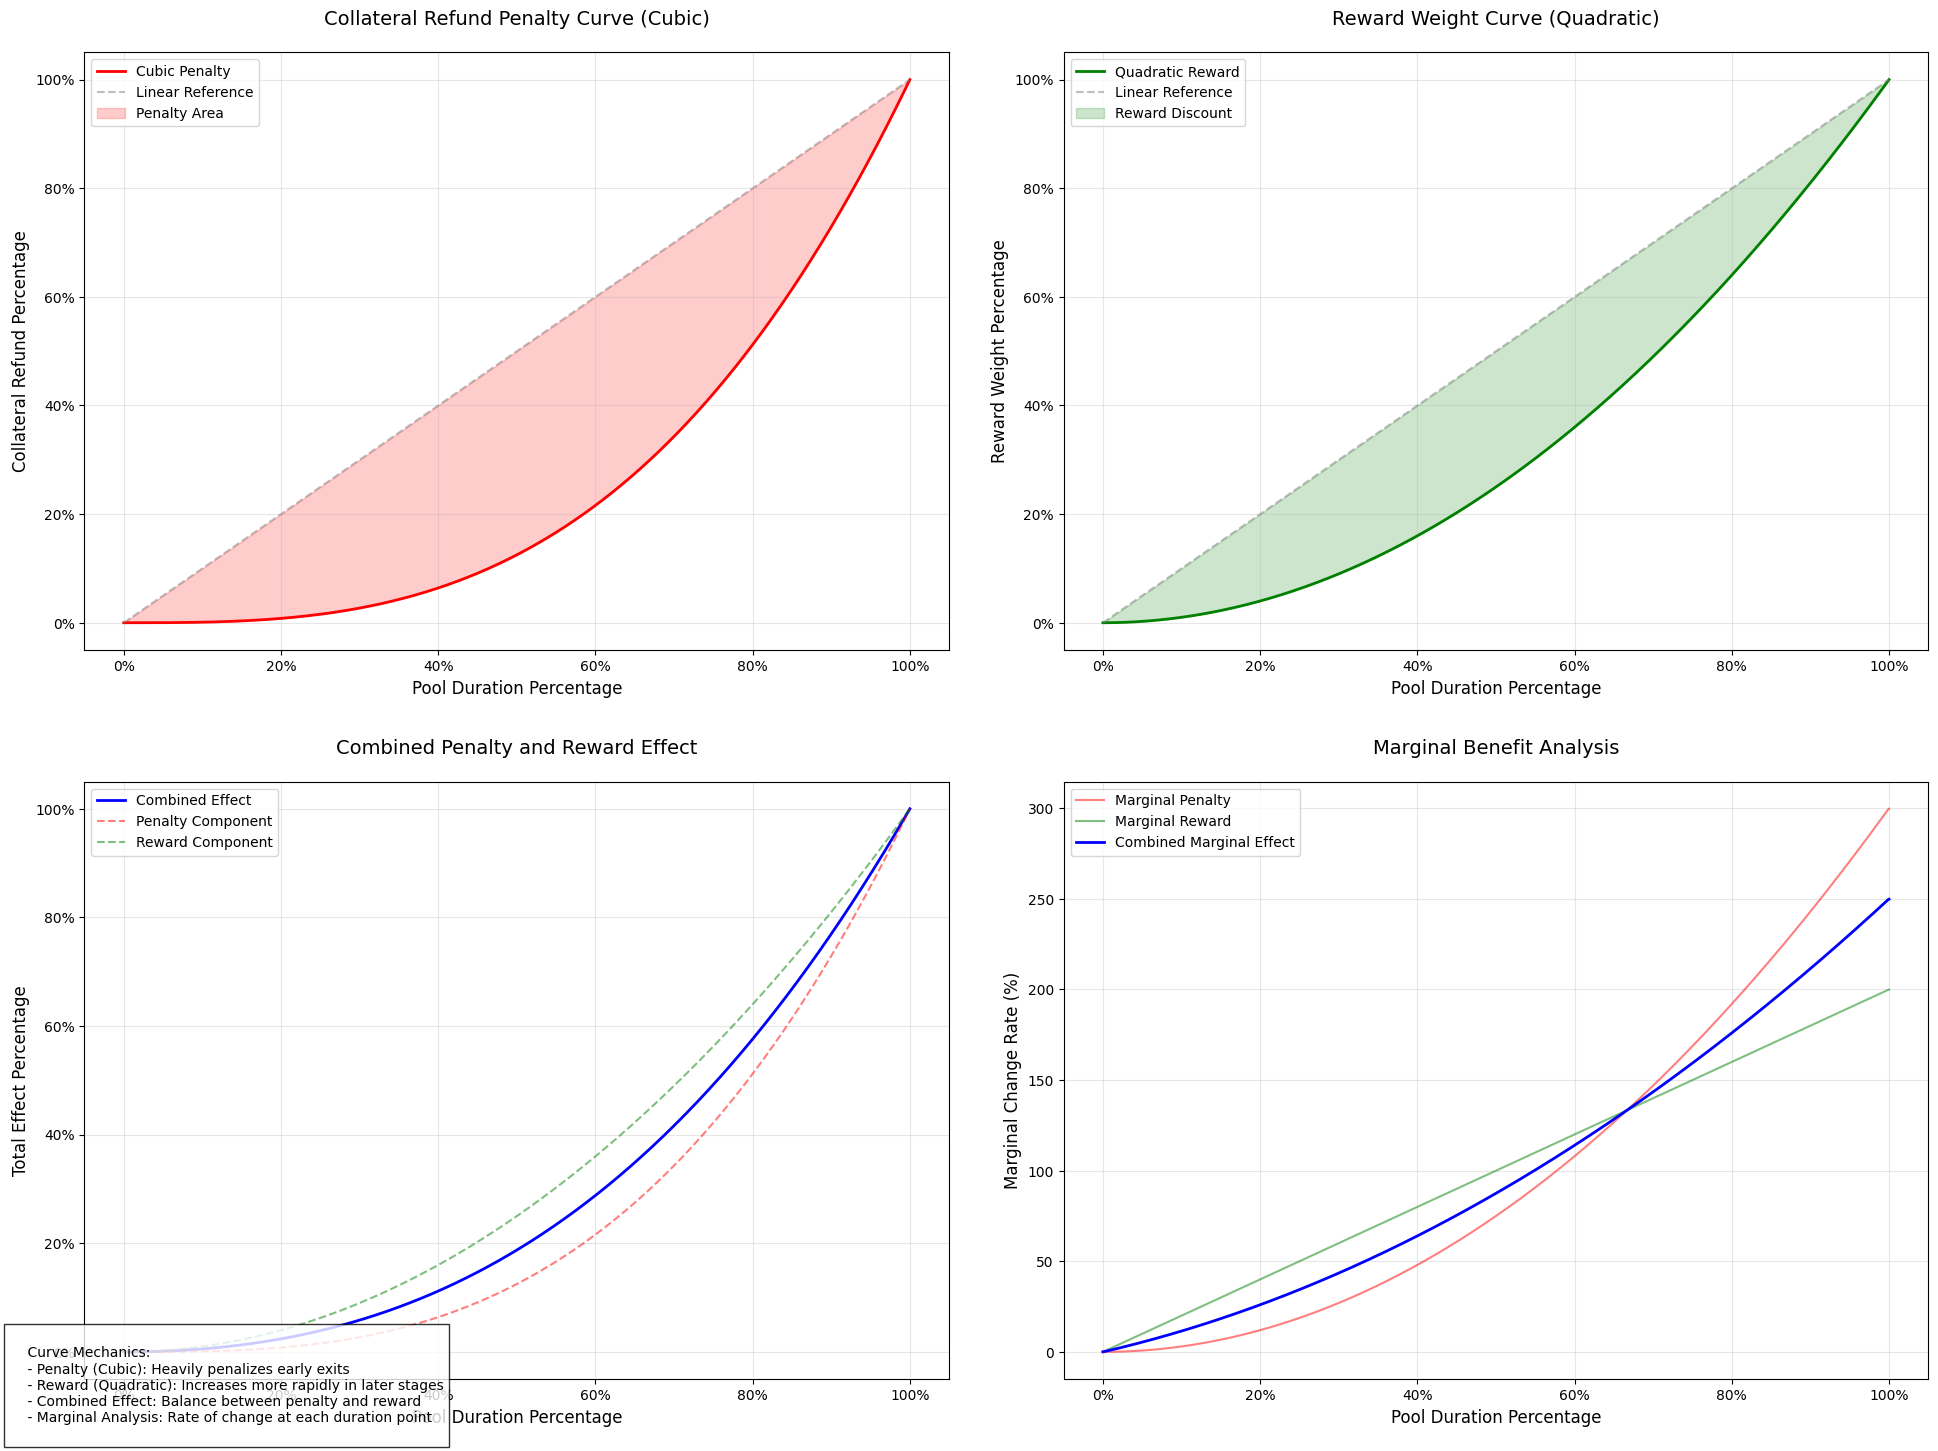


Key Points Analysis:
------------------------------------------------------------
  Duration %    Penalty %     Reward %   Combined %
------------------------------------------------------------
       10.0%         0.1%         1.0%         0.6%
       25.0%         1.6%         6.2%         3.9%
       50.0%        12.5%        25.0%        18.8%
       75.0%        42.2%        56.2%        49.2%
       90.0%        72.9%        81.0%        77.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_reward_penalty_mechanics():
    # Create percentage range for x-axis
    duration_percentages = np.linspace(0, 1, 1000)

    # Calculate different curve components
    cubic_penalty = duration_percentages ** 3  # Cubic penalty curve
    quadratic_reward = duration_percentages ** 2  # Quadratic reward curve
    linear_reference = duration_percentages  # Linear reference line

    # Create comparison plot with multiple curves
    plt.figure(figsize=(20, 15))

    # Plot 1: Penalty Curve (Cubic)
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(duration_percentages * 100, cubic_penalty * 100,
             'r-', linewidth=2, label='Cubic Penalty')
    ax1.plot(duration_percentages * 100, linear_reference * 100,
             '--', color='gray', alpha=0.5, label='Linear Reference')
    ax1.fill_between(duration_percentages * 100, cubic_penalty * 100,
                     linear_reference * 100, alpha=0.2, color='red',
                     label='Penalty Area')

    ax1.set_title('Collateral Refund Penalty Curve (Cubic)', fontsize=14, pad=20)
    ax1.set_xlabel('Pool Duration Percentage', fontsize=12)
    ax1.set_ylabel('Collateral Refund Percentage', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)

    # Add percentage signs to axes
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    # Plot 2: Reward Curve (Quadratic)
    ax2 = plt.subplot(2, 2, 2)
    ax2.plot(duration_percentages * 100, quadratic_reward * 100,
             'g-', linewidth=2, label='Quadratic Reward')
    ax2.plot(duration_percentages * 100, linear_reference * 100,
             '--', color='gray', alpha=0.5, label='Linear Reference')
    ax2.fill_between(duration_percentages * 100, quadratic_reward * 100,
                     linear_reference * 100, alpha=0.2, color='green',
                     label='Reward Discount')

    ax2.set_title('Reward Weight Curve (Quadratic)', fontsize=14, pad=20)
    ax2.set_xlabel('Pool Duration Percentage', fontsize=12)
    ax2.set_ylabel('Reward Weight Percentage', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)

    # Add percentage signs to axes
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    # Plot 3: Combined Effect
    ax3 = plt.subplot(2, 2, 3)
    combined_effect = (cubic_penalty + quadratic_reward) / 2

    ax3.plot(duration_percentages * 100, combined_effect * 100,
             'b-', linewidth=2, label='Combined Effect')
    ax3.plot(duration_percentages * 100, cubic_penalty * 100,
             'r--', alpha=0.5, label='Penalty Component')
    ax3.plot(duration_percentages * 100, quadratic_reward * 100,
             'g--', alpha=0.5, label='Reward Component')

    ax3.set_title('Combined Penalty and Reward Effect', fontsize=14, pad=20)
    ax3.set_xlabel('Pool Duration Percentage', fontsize=12)
    ax3.set_ylabel('Total Effect Percentage', fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=10)

    # Add percentage signs to axes
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    # Plot 4: Marginal Benefit Analysis
    ax4 = plt.subplot(2, 2, 4)

    # Calculate marginal benefits (derivatives)
    dx = duration_percentages[1] - duration_percentages[0]
    penalty_marginal = np.gradient(cubic_penalty, dx) * 100
    reward_marginal = np.gradient(quadratic_reward, dx) * 100
    combined_marginal = np.gradient(combined_effect, dx) * 100

    ax4.plot(duration_percentages * 100, penalty_marginal,
             'r-', alpha=0.5, label='Marginal Collateral Refund')
    ax4.plot(duration_percentages * 100, reward_marginal,
             'g-', alpha=0.5, label='Marginal Reward')
    ax4.plot(duration_percentages * 100, combined_marginal,
             'b-', linewidth=2, label='Combined Marginal Effect')

    ax4.set_title('Marginal Benefit Analysis', fontsize=14, pad=20)
    ax4.set_xlabel('Pool Duration Percentage', fontsize=12)
    ax4.set_ylabel('Marginal Change Rate (%)', fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=10)

    # Add percentage signs to x-axis
    ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

    plt.tight_layout(pad=3.0)

    # Add text explanation
    plt.figtext(0.02, 0.02, """
    Curve Mechanics:
    - Penalty (Cubic): Heavily penalizes early exits
    - Reward (Quadratic): Increases more rapidly in later stages
    - Combined Effect: Balance between penalty and reward
    - Marginal Analysis: Rate of change at each duration point
    """, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

    # Additional analysis: Key points table
    key_points = [0.1, 0.25, 0.5, 0.75, 0.9]

    print("\nKey Points Analysis:")
    print("-" * 60)
    print(f"{'Duration %':>12} {'Collateral Refund %':>12} {'Reward %':>12} {'Combined %':>12}")
    print("-" * 60)

    for p in key_points:
        penalty = (p ** 3) * 100
        reward = (p ** 2) * 100
        combined = ((p ** 3 + p ** 2) / 2) * 100
        print(f"{p*100:>11.1f}% {penalty:>11.1f}% {reward:>11.1f}% {combined:>11.1f}%")

# Run the visualization
plot_reward_penalty_mechanics()

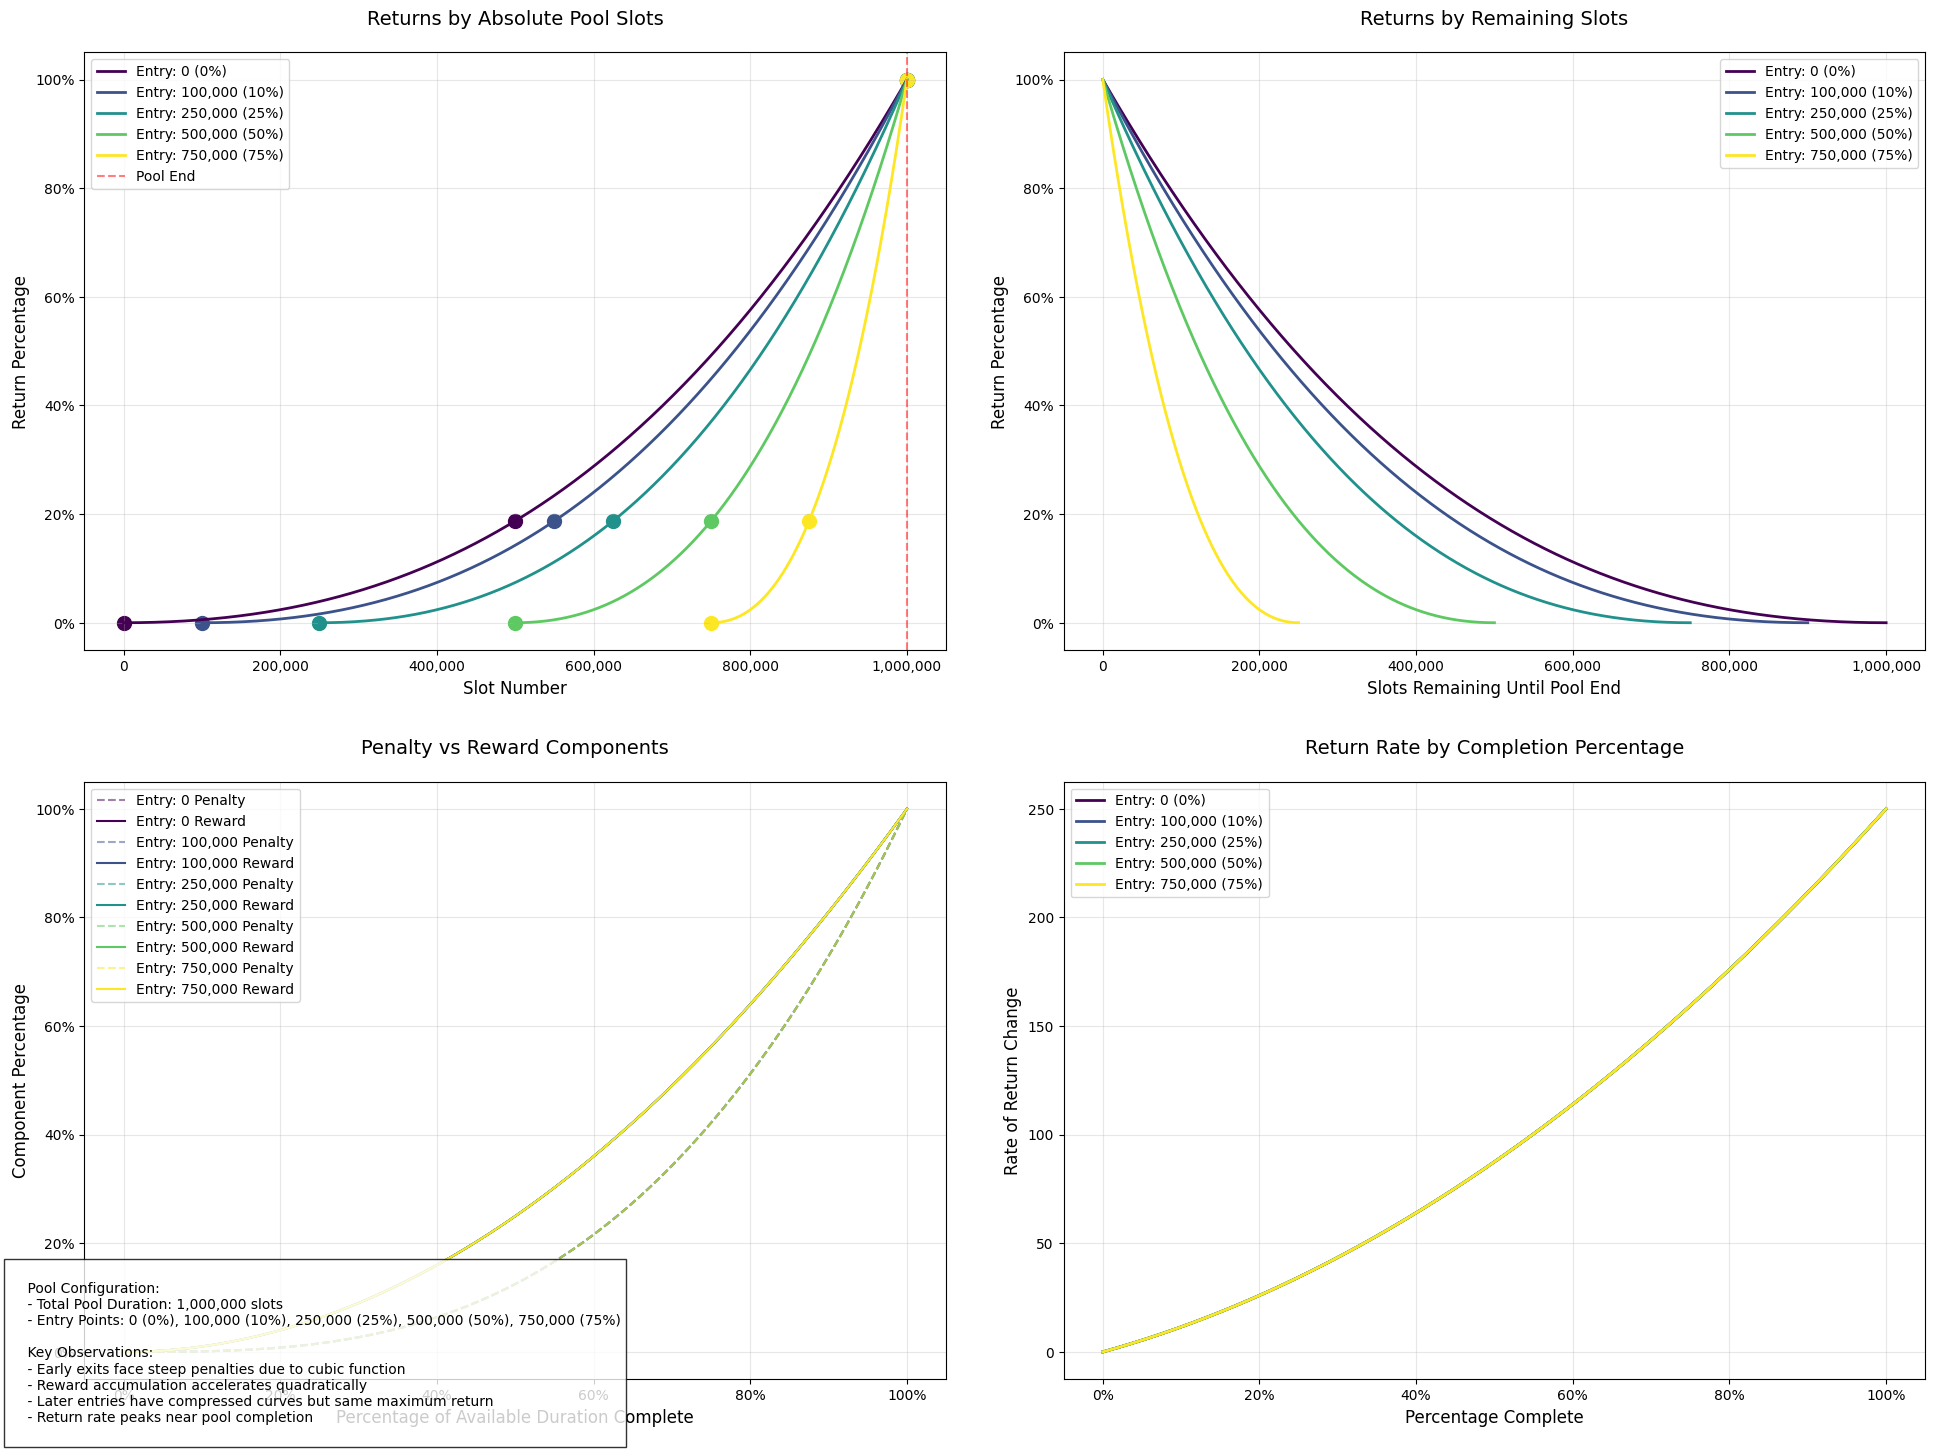


Entry Point Analysis:
--------------------------------------------------------------------------------
     Entry Slot Slots Remaining    Entry % Mid-Exit Return
--------------------------------------------------------------------------------
              0       1,000,000       0.0%           18.8%
        100,000         900,000      10.0%           18.8%
        250,000         750,000      25.0%           18.8%
        500,000         500,000      50.0%           18.8%
        750,000         250,000      75.0%           18.8%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_slot_based_curves():
    # Pool parameters in slots
    total_pool_slots = 1_000_000  # Example: 1 million slots
    entry_points = [0,
                   total_pool_slots // 10,  # 10% in
                   total_pool_slots // 4,   # 25% in
                   total_pool_slots // 2,   # 50% in
                   int(total_pool_slots * 0.75)]  # 75% in

    plt.figure(figsize=(20, 15))

    # Plot 1: Absolute Slot View
    ax1 = plt.subplot(2, 2, 1)
    colors = plt.cm.viridis(np.linspace(0, 1, len(entry_points)))

    for i, entry_slot in enumerate(entry_points):
        remaining_slots = total_pool_slots - entry_slot
        if remaining_slots <= 0:
            continue

        # Generate slot points for this entry
        slots = np.linspace(entry_slot, total_pool_slots, 1000)
        duration_percentage = (slots - entry_slot) / remaining_slots

        # Calculate rewards and penalties
        penalty = duration_percentage ** 3
        reward = duration_percentage ** 2
        combined = (penalty + reward) / 2

        label = f'Entry: {entry_slot:,} ({(entry_slot/total_pool_slots)*100:.0f}%)'
        ax1.plot(slots, combined * 100, '-', color=colors[i],
                label=label, linewidth=2)

        # Add markers for key points
        mid_point = entry_slot + remaining_slots/2
        ax1.scatter([entry_slot, mid_point, total_pool_slots],
                   [0, (0.5**3 + 0.5**2)/2 * 100, 100],
                   color=colors[i], s=100)

    ax1.axvline(x=total_pool_slots, color='red', linestyle='--',
                label='Pool End', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Returns by Absolute Pool Slots', fontsize=14, pad=20)
    ax1.set_xlabel('Slot Number', fontsize=12)
    ax1.set_ylabel('Return Percentage', fontsize=12)
    ax1.legend(fontsize=10, loc='upper left')
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Plot 2: Remaining Slots View
    ax2 = plt.subplot(2, 2, 2)

    for i, entry_slot in enumerate(entry_points):
        remaining_slots = total_pool_slots - entry_slot
        if remaining_slots <= 0:
            continue

        # Generate points based on remaining slots
        slots_left = np.linspace(remaining_slots, 0, 1000)
        percentage_complete = 1 - (slots_left / remaining_slots)

        # Calculate rewards and penalties
        penalty = percentage_complete ** 3
        reward = percentage_complete ** 2
        combined = (penalty + reward) / 2

        label = f'Entry: {entry_slot:,} ({(entry_slot/total_pool_slots)*100:.0f}%)'
        ax2.plot(slots_left, combined * 100, '-', color=colors[i],
                label=label, linewidth=2)

    ax2.grid(True, alpha=0.3)
    ax2.set_title('Returns by Remaining Slots', fontsize=14, pad=20)
    ax2.set_xlabel('Slots Remaining Until Pool End', fontsize=12)
    ax2.set_ylabel('Return Percentage', fontsize=12)
    ax2.legend(fontsize=10, loc='upper right')
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Plot 3: Early Exit Penalty Impact
    ax3 = plt.subplot(2, 2, 3)

    for i, entry_slot in enumerate(entry_points):
        remaining_slots = total_pool_slots - entry_slot
        if remaining_slots <= 0:
            continue

        # Generate percentage points
        completion_percent = np.linspace(0, 1, 1000)

        # Separate penalty and reward components
        penalty = completion_percent ** 3
        reward = completion_percent ** 2

        label = f'Entry: {entry_slot:,}'
        ax3.plot(completion_percent * 100, penalty * 100, '--', color=colors[i],
                label=f'{label} Penalty', alpha=0.5)
        ax3.plot(completion_percent * 100, reward * 100, '-', color=colors[i],
                label=f'{label} Reward')

    ax3.grid(True, alpha=0.3)
    ax3.set_title('Penalty vs Reward Components', fontsize=14, pad=20)
    ax3.set_xlabel('Percentage of Available Duration Complete', fontsize=12)
    ax3.set_ylabel('Component Percentage', fontsize=12)
    ax3.legend(fontsize=10)
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    # Plot 4: Differential Return Rate
    ax4 = plt.subplot(2, 2, 4)

    for i, entry_slot in enumerate(entry_points):
        remaining_slots = total_pool_slots - entry_slot
        if remaining_slots <= 0:
            continue

        completion_percent = np.linspace(0, 1, 1000)

        # Calculate rate of change for combined return
        penalty_rate = 3 * completion_percent ** 2  # Derivative of cubic
        reward_rate = 2 * completion_percent      # Derivative of quadratic
        combined_rate = (penalty_rate + reward_rate) / 2

        label = f'Entry: {entry_slot:,} ({(entry_slot/total_pool_slots)*100:.0f}%)'
        ax4.plot(completion_percent * 100, combined_rate * 100, '-', color=colors[i],
                label=label, linewidth=2)

    ax4.grid(True, alpha=0.3)
    ax4.set_title('Return Rate by Completion Percentage', fontsize=14, pad=20)
    ax4.set_xlabel('Percentage Complete', fontsize=12)
    ax4.set_ylabel('Rate of Return Change', fontsize=12)
    ax4.legend(fontsize=10)
    ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

    plt.tight_layout(pad=3.0)

    # Add explanation text
    plt.figtext(0.02, 0.02, f"""
    Pool Configuration:
    - Total Pool Duration: {total_pool_slots:,} slots
    - Entry Points: {', '.join([f'{slot:,} ({(slot/total_pool_slots)*100:.0f}%)' for slot in entry_points])}

    Key Observations:
    - Early exits face steep penalties due to cubic function
    - Reward accumulation accelerates quadratically
    - Later entries have compressed curves but same maximum return
    - Return rate peaks near pool completion
    """, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

    # Print detailed analysis
    print("\nEntry Point Analysis:")
    print("-" * 80)
    print(f"{'Entry Slot':>15} {'Slots Remaining':>15} {'Entry %':>10} {'Mid-Exit Return':>15}")
    print("-" * 80)

    for entry_slot in entry_points:
        remaining = total_pool_slots - entry_slot
        if remaining <= 0:
            continue
        entry_percent = (entry_slot / total_pool_slots) * 100
        mid_return = ((0.5**3 + 0.5**2)/2) * 100
        print(f"{entry_slot:>15,} {remaining:>15,} {entry_percent:>9.1f}% {mid_return:>14.1f}%")

# Run the visualization
plot_slot_based_curves()